# Avocado Prices Prediction

It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

In [1]:
# Load the python packages
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('avocado.csv', index_col='Date') # df stand for dataframe.
# Also it is a common convention to call this df
# .head() is used first five rows
df.head()

Unnamed: 0  AveragePrice  Total Volume     4046       4225  \
Date                                                                     
2015-12-27           0          1.33      64236.62  1036.74   54454.85   
2015-12-20           1          1.35      54876.98   674.28   44638.81   
2015-12-13           2          0.93     118220.22   794.70  109149.67   
2015-12-06           3          1.08      78992.15  1132.00   71976.41   
2015-11-29           4          1.28      51039.60   941.48   43838.39   

              4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Date                                                                  
2015-12-27   48.16     8696.87     8603.62       93.25          0.0   
2015-12-20   58.33     9505.56     9408.07       97.49          0.0   
2015-12-13  130.50     8145.35     8042.21      103.14          0.0   
2015-12-06   72.58     5811.16     5677.40      133.76          0.0   
2015-11-29   75.78     6183.95     5986.26      197.69          0.0   

                    type  year  region  
Date                                    
2015-12-27  conventional  2015  Albany  
2015-12-20  conventional  2015  Albany  
2015-12-13  conventional  2015  Albany  
2015-12-06  conventional  2015  Albany  
2015-11-29  conventional  2015  Albany

In [3]:
# Drop column Unnamed: 0
df.drop(labels=['Unnamed: 0'],axis=1)

AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...                  ...           ...      ...        ...     ...   
2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-12-27     8696.87     8603.62       93.25          0.0  conventional   
2015-12-20     9505.56     9408.07       97.49          0.0  conventional   
2015-12-13     8145.35     8042.21      103.14          0.0  conventional   
2015-12-06     5811.16     5677.40      133.76          0.0  conventional   
2015-11-29     6183.95     5986.26      197.69          0.0  conventional   
...                ...         ...         ...          ...           ...   
2018-02-04    13498.67    13066.82      431.85          0.0       organic   
2018-01-28     9264.84     8940.04      324.80          0.0       organic   
2018-01-21     9394.11     9351.80       42.31          0.0       organic   
2018-01-14    10969.54    10919.54       50.00          0.0       organic   
2018-01-07    12014.15    11988.14       26.01          0.0       organic   

            year            region  
Date                                
2015-12-27  2015            Albany  
2015-12-20  2015            Albany  
2015-12-13  2015            Albany  
2015-12-06  2015            Albany  
2015-11-29  2015            Albany  
...          ...               ...  
2018-02-04  2018  WestTexNewMexico  
2018-01-28  2018  WestTexNewMexico  
2018-01-21  2018  WestTexNewMexico  
2018-01-14  2018  WestTexNewMexico  
2018-01-07  2018  WestTexNewMexico  

[18249 rows x 12 columns]

In [4]:
# rename the columns
df=df.rename(columns={
    'Date':'Date',
    'AveragePrice':'Average_Price',
    'Total Volume':'Total_Volume',
    '4046':'PLU_4046_sold',
    '4225':'PLU_4225_sold',
    '4770':'PLU_4770_sold',
    'Total Bags':'Total_Bags',
    'Small Bags':'Small_Bags',
    'Large Bags':'Large_Bags',
    'XLarge Bags':'XLarge_Bags',
    'type':'Type',
    'year':'Year',
    'region':'Region'})

In [5]:
df.drop(labels=['Unnamed: 0'],axis=1)

Average_Price  Total_Volume  PLU_4046_sold  PLU_4225_sold  \
Date                                                                    
2015-12-27           1.33      64236.62        1036.74       54454.85   
2015-12-20           1.35      54876.98         674.28       44638.81   
2015-12-13           0.93     118220.22         794.70      109149.67   
2015-12-06           1.08      78992.15        1132.00       71976.41   
2015-11-29           1.28      51039.60         941.48       43838.39   
...                   ...           ...            ...            ...   
2018-02-04           1.63      17074.83        2046.96        1529.20   
2018-01-28           1.71      13888.04        1191.70        3431.50   
2018-01-21           1.87      13766.76        1191.92        2452.79   
2018-01-14           1.93      16205.22        1527.63        2981.04   
2018-01-07           1.62      17489.58        2894.77        2356.13   

            PLU_4770_sold  Total_Bags  Small_Bags  Large_Bags  XLarge_Bags  \
Date                                                                         
2015-12-27          48.16     8696.87     8603.62       93.25          0.0   
2015-12-20          58.33     9505.56     9408.07       97.49          0.0   
2015-12-13         130.50     8145.35     8042.21      103.14          0.0   
2015-12-06          72.58     5811.16     5677.40      133.76          0.0   
2015-11-29          75.78     6183.95     5986.26      197.69          0.0   
...                   ...         ...         ...         ...          ...   
2018-02-04           0.00    13498.67    13066.82      431.85          0.0   
2018-01-28           0.00     9264.84     8940.04      324.80          0.0   
2018-01-21         727.94     9394.11     9351.80       42.31          0.0   
2018-01-14         727.01    10969.54    10919.54       50.00          0.0   
2018-01-07         224.53    12014.15    11988.14       26.01          0.0   

                    Type  Year            Region  
Date                                              
2015-12-27  conventional  2015            Albany  
2015-12-20  conventional  2015            Albany  
2015-12-13  conventional  2015            Albany  
2015-12-06  conventional  2015            Albany  
2015-11-29  conventional  2015            Albany  
...                  ...   ...               ...  
2018-02-04       organic  2018  WestTexNewMexico  
2018-01-28       organic  2018  WestTexNewMexico  
2018-01-21       organic  2018  WestTexNewMexico  
2018-01-14       organic  2018  WestTexNewMexico  
2018-01-07       organic  2018  WestTexNewMexico  

[18249 rows x 12 columns]

In [6]:
# Shows the first five rows of AveragePrice column in df
# df.AveragePrice.head() also shows same value
df['Average_Price'].head()

Date
2015-12-27    1.33
2015-12-20    1.35
2015-12-13    0.93
2015-12-06    1.08
2015-11-29    1.28
Name: Average_Price, dtype: float64

In [7]:
del df['Unnamed: 0']

In [8]:
df.head()

Average_Price  Total_Volume  PLU_4046_sold  PLU_4225_sold  \
Date                                                                    
2015-12-27           1.33      64236.62        1036.74       54454.85   
2015-12-20           1.35      54876.98         674.28       44638.81   
2015-12-13           0.93     118220.22         794.70      109149.67   
2015-12-06           1.08      78992.15        1132.00       71976.41   
2015-11-29           1.28      51039.60         941.48       43838.39   

            PLU_4770_sold  Total_Bags  Small_Bags  Large_Bags  XLarge_Bags  \
Date                                                                         
2015-12-27          48.16     8696.87     8603.62       93.25          0.0   
2015-12-20          58.33     9505.56     9408.07       97.49          0.0   
2015-12-13         130.50     8145.35     8042.21      103.14          0.0   
2015-12-06          72.58     5811.16     5677.40      133.76          0.0   
2015-11-29          75.78     6183.95     5986.26      197.69          0.0   

                    Type  Year  Region  
Date                                    
2015-12-27  conventional  2015  Albany  
2015-12-20  conventional  2015  Albany  
2015-12-13  conventional  2015  Albany  
2015-12-06  conventional  2015  Albany  
2015-11-29  conventional  2015  Albany

In [9]:
# Checking for unique values in region
df['Region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [10]:
# Create a list
Region=df["Region"].unique().tolist()
Region

['Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'TotalUS',
 'West',
 'WestTexNewMexico']

In [11]:

def Plot_Time_Series(x,y):
    y=df[df['Region']==x]
    plt.figure(figsize=(10,10))
    ax=y['Average_Price'].plot()
    plt.title(x)
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    figure = ax.get_figure()
    figure.savefig(x, dpi=100)
    plt.show()

Albany


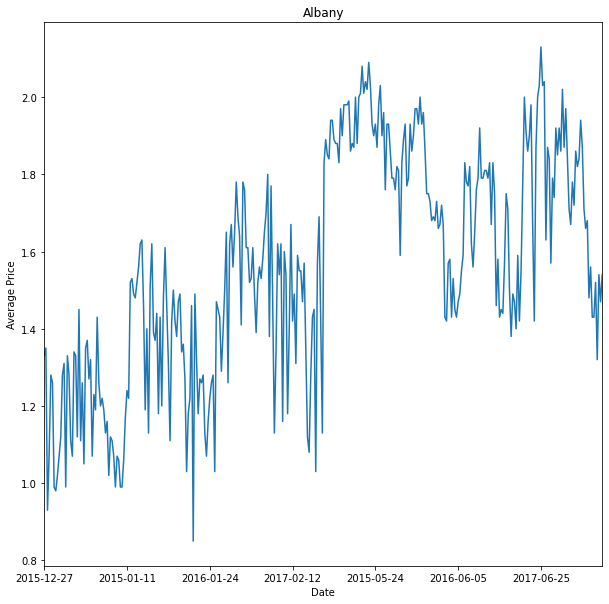

Atlanta


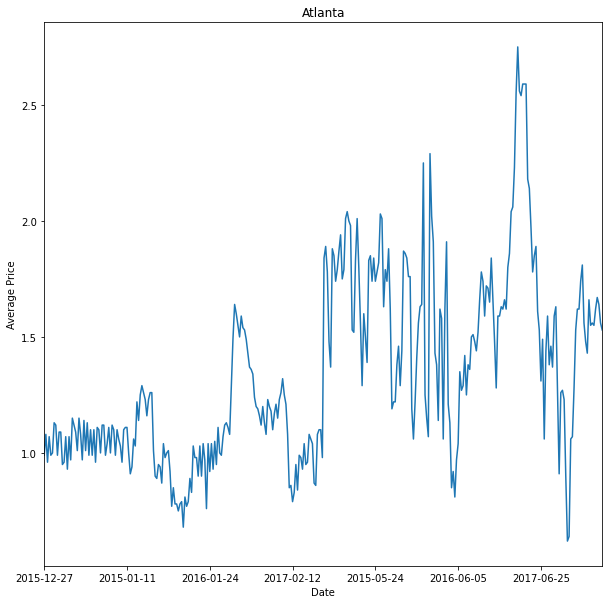

BaltimoreWashington


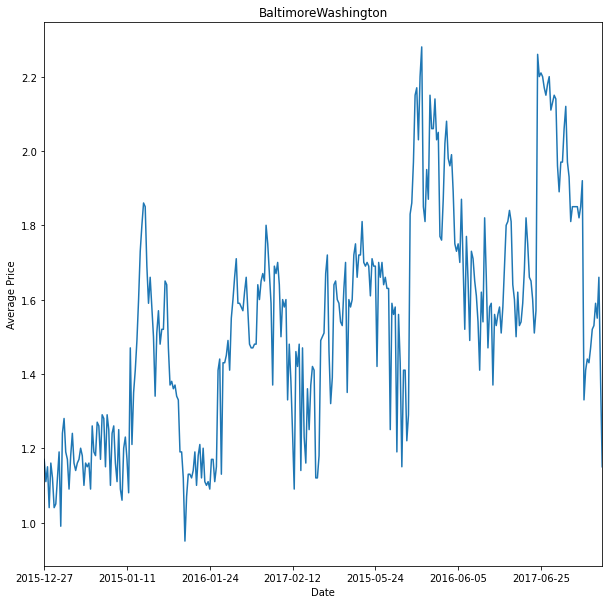

Boise


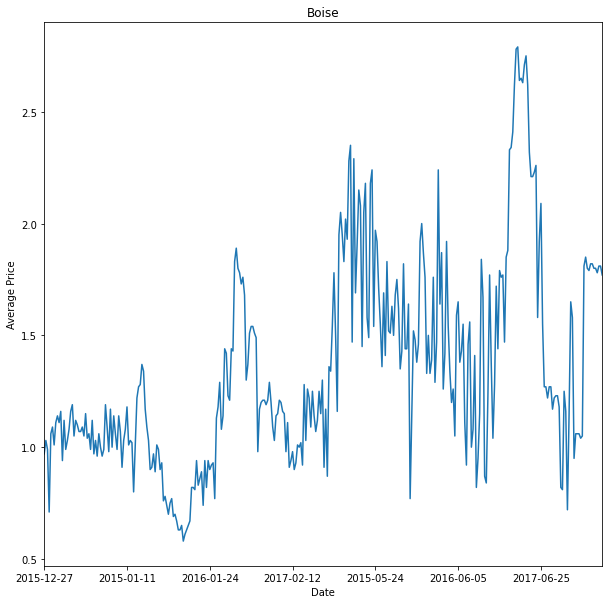

Boston


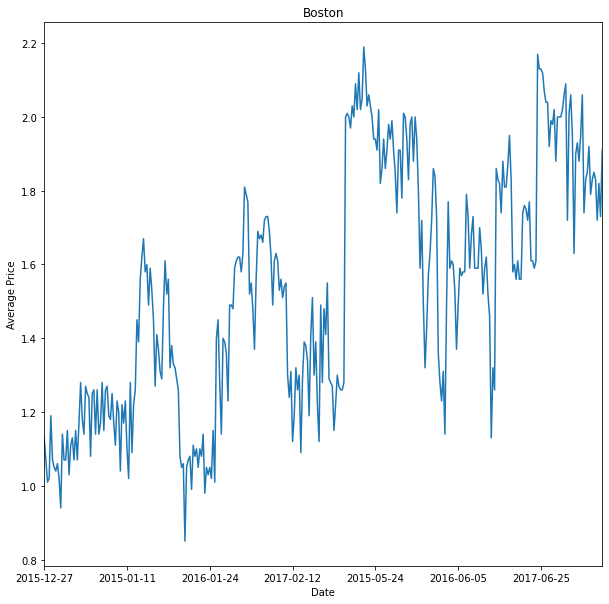

BuffaloRochester


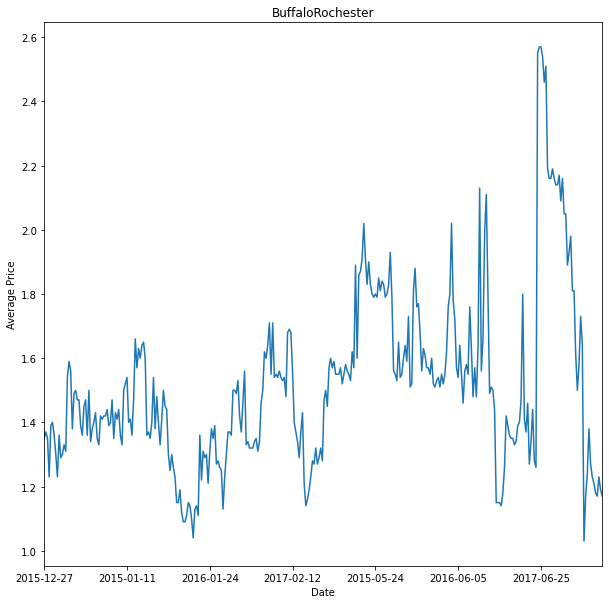

California


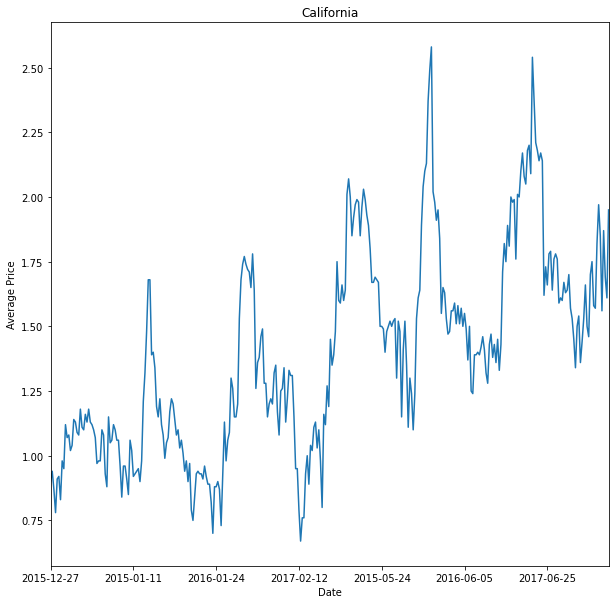

Charlotte


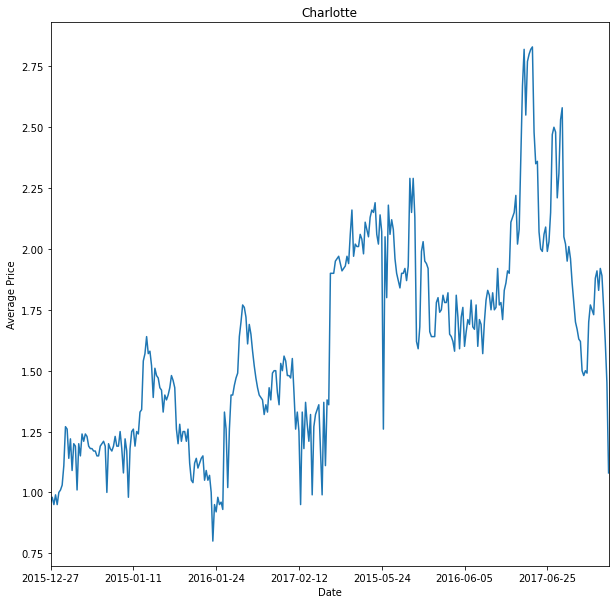

Chicago


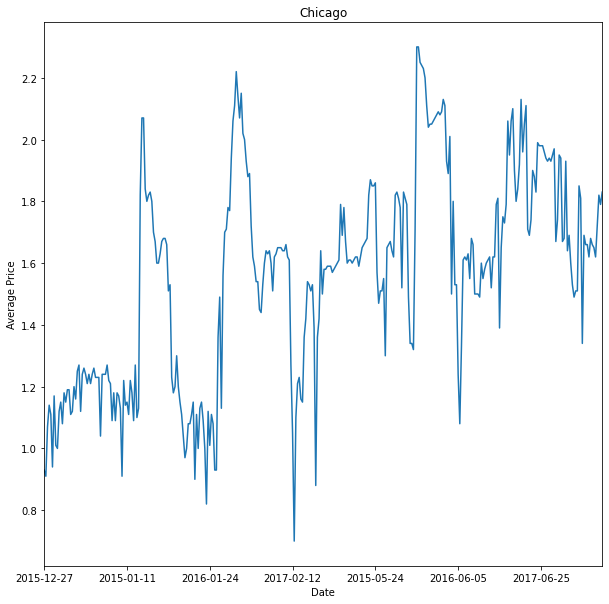

CincinnatiDayton


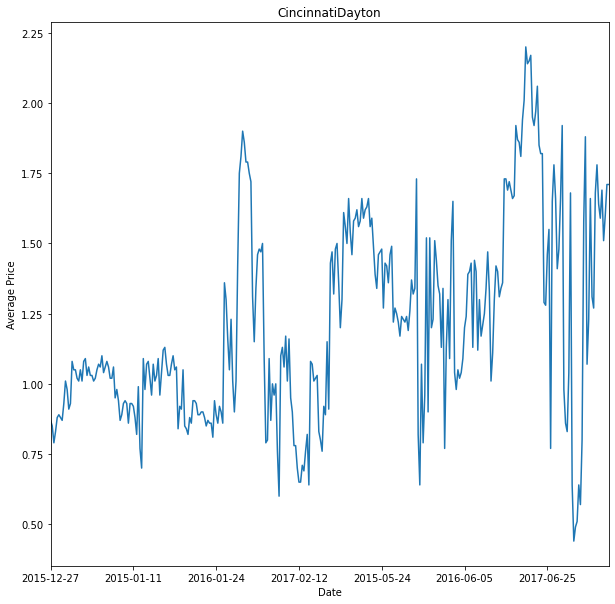

Columbus


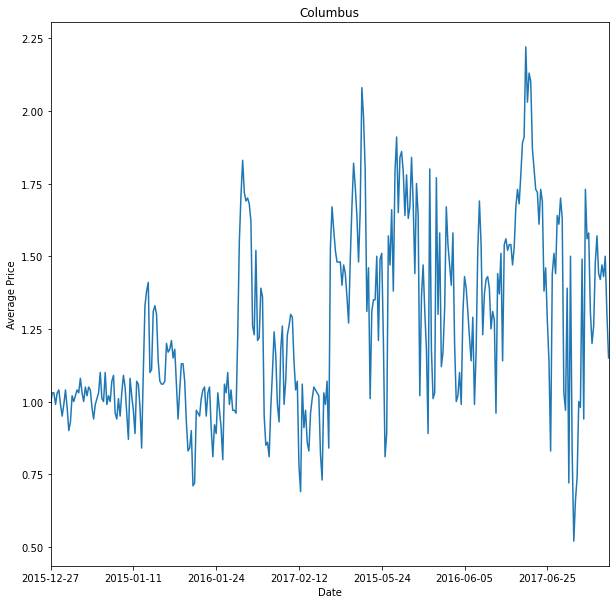

DallasFtWorth


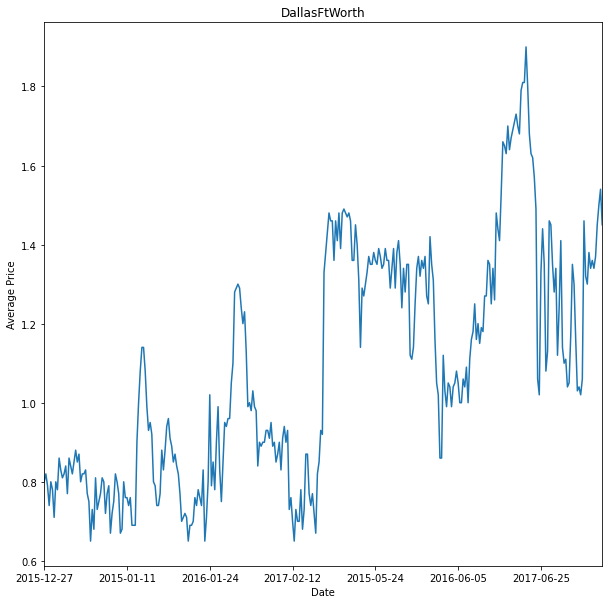

Denver


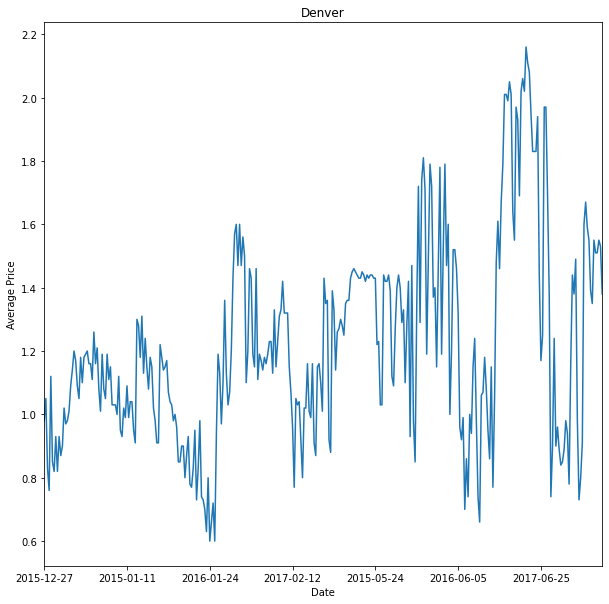

Detroit


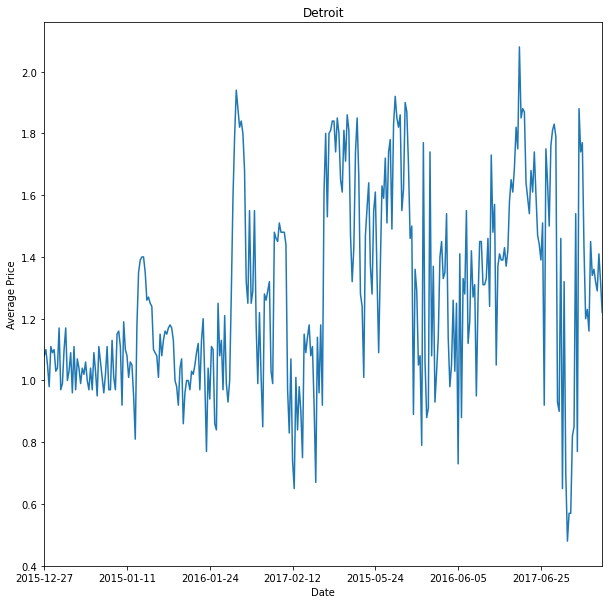

GrandRapids


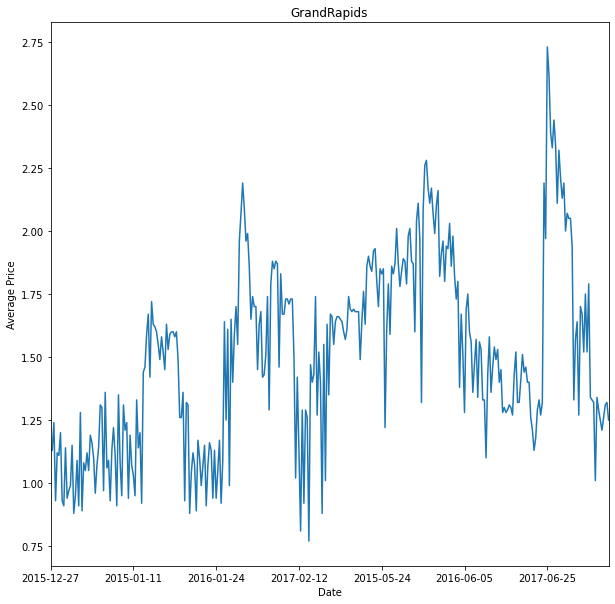

GreatLakes


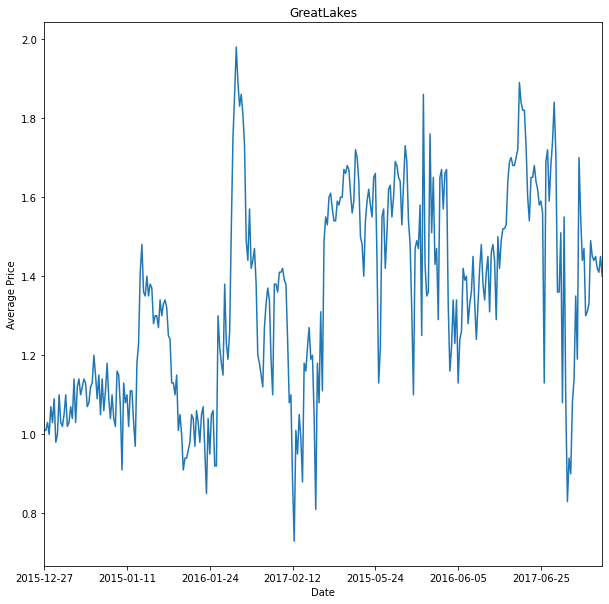

HarrisburgScranton


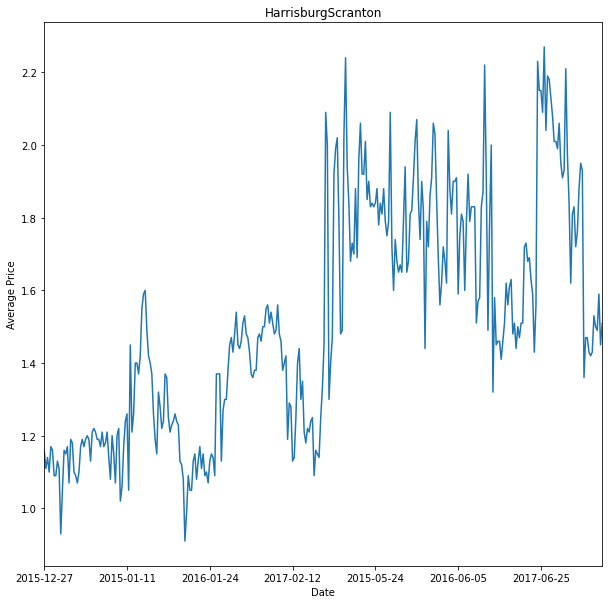

HartfordSpringfield


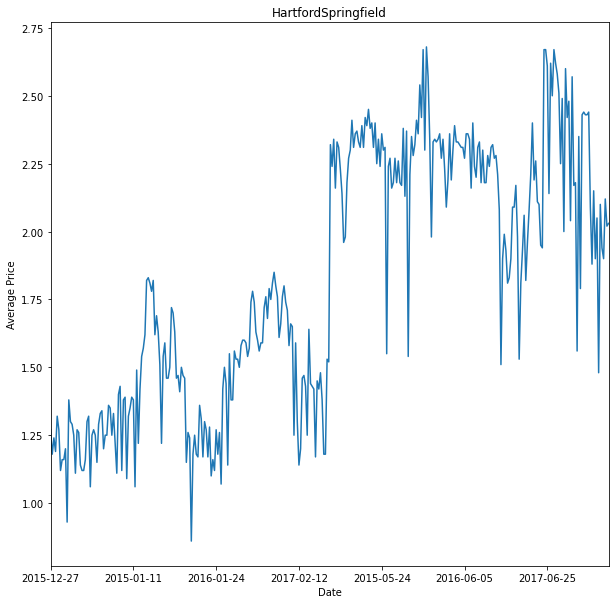

Houston


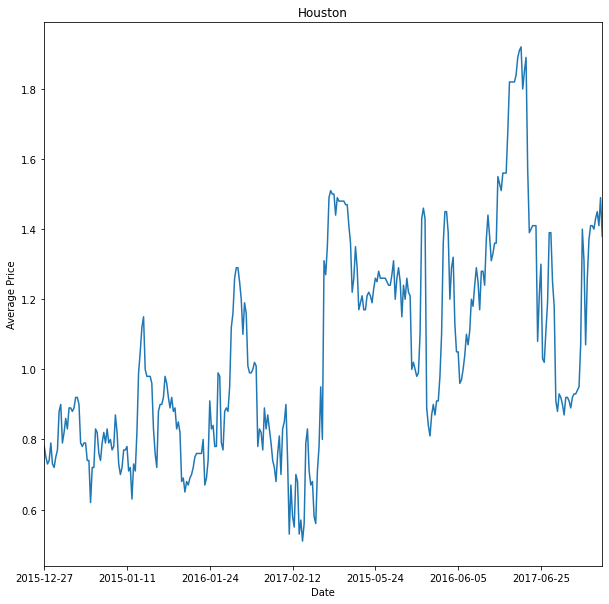

Indianapolis


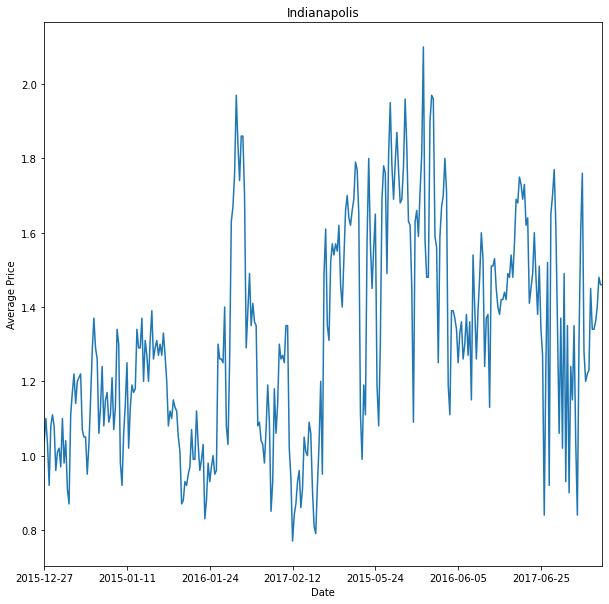

Jacksonville


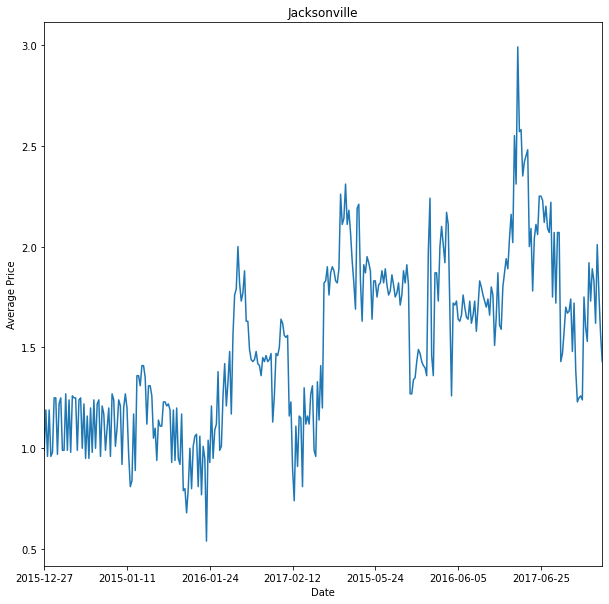

LasVegas


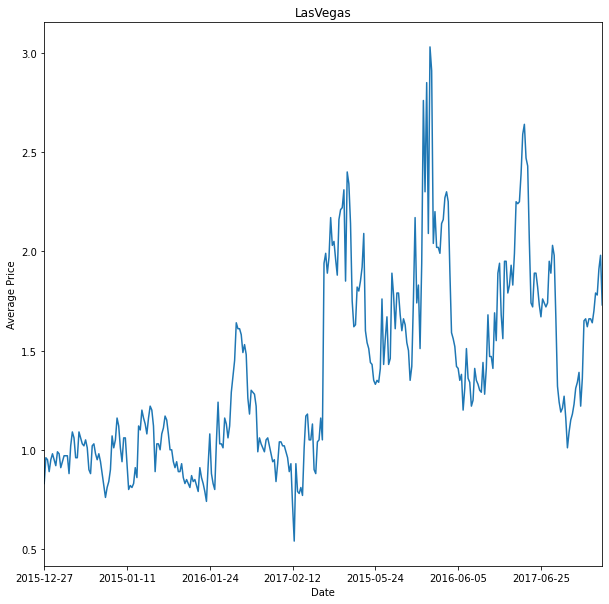

LosAngeles


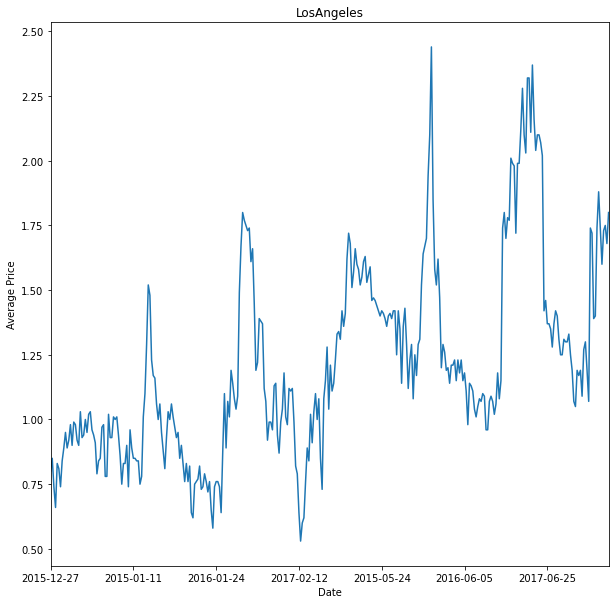

Louisville


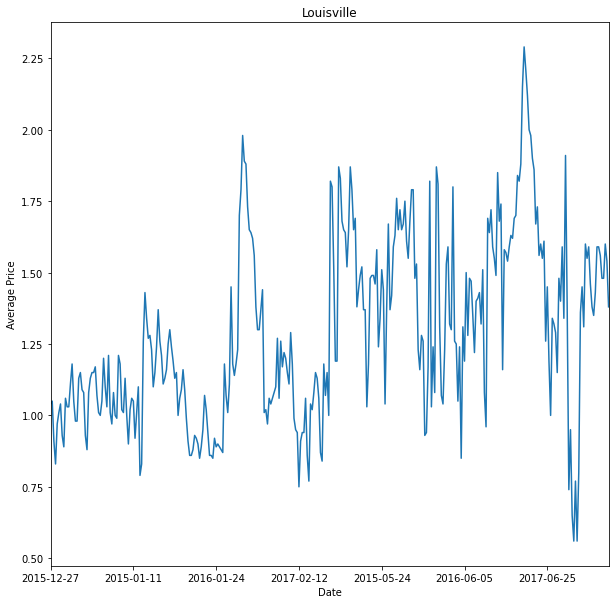

MiamiFtLauderdale


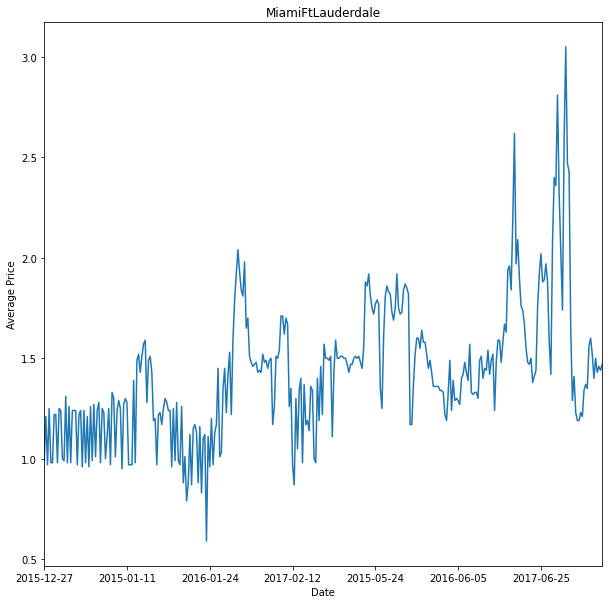

Midsouth


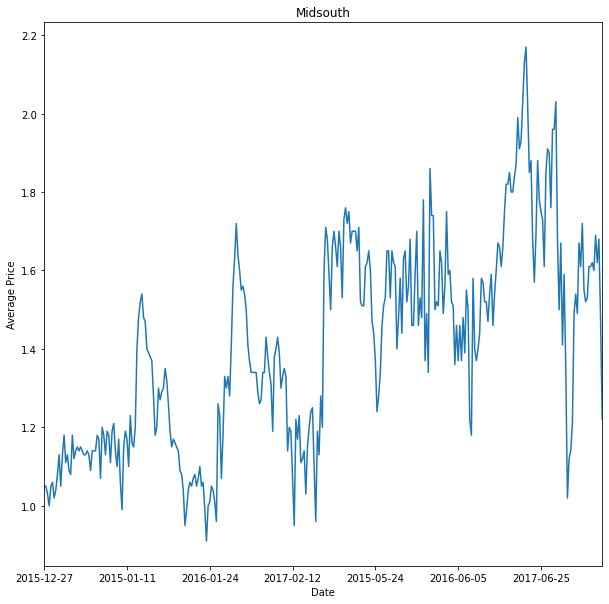

Nashville


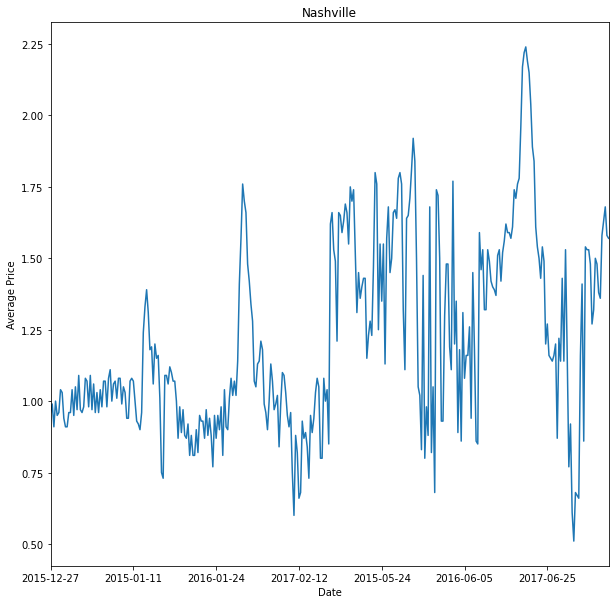

NewOrleansMobile


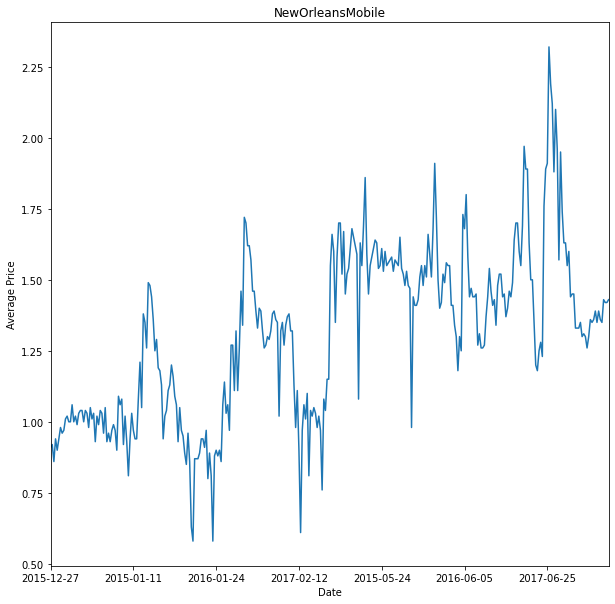

NewYork


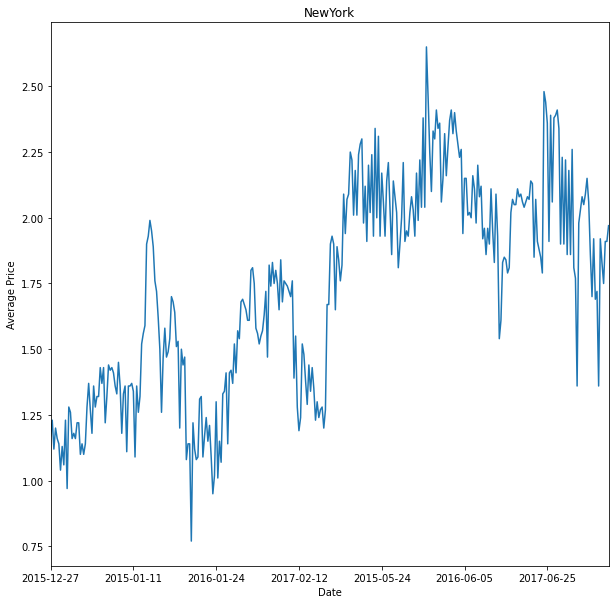

Northeast


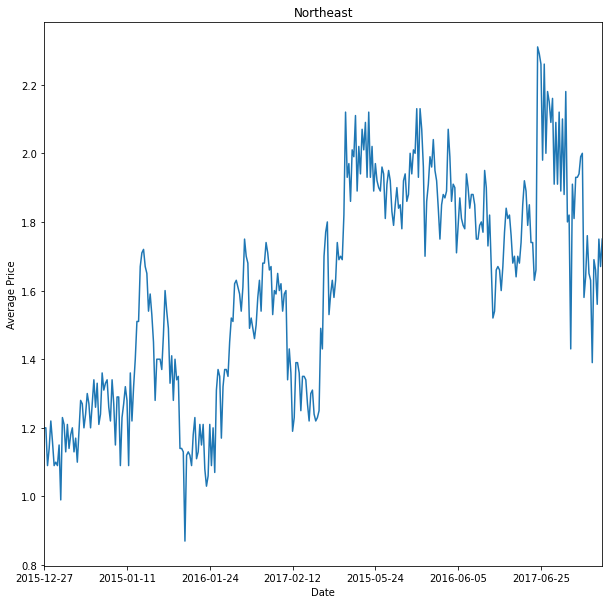

NorthernNewEngland


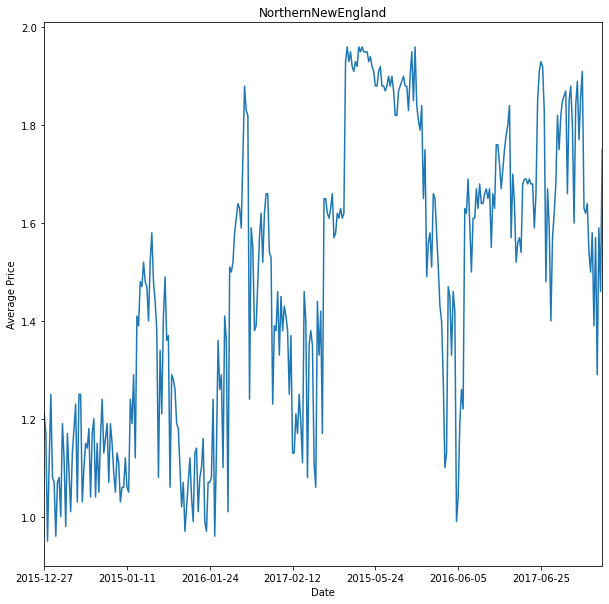

Orlando


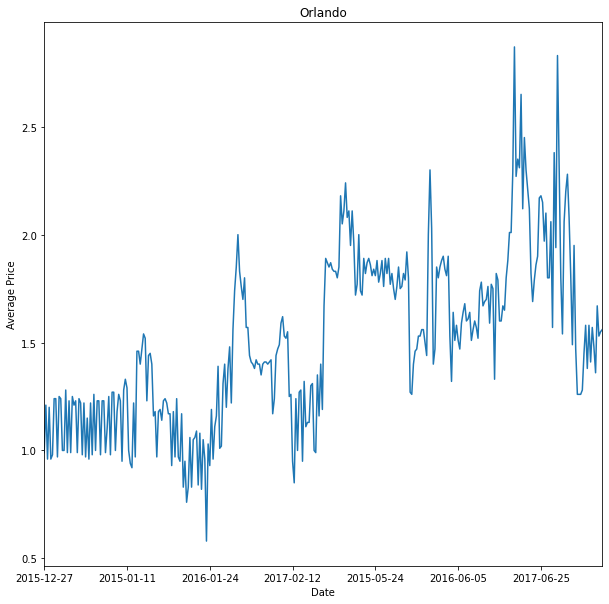

Philadelphia


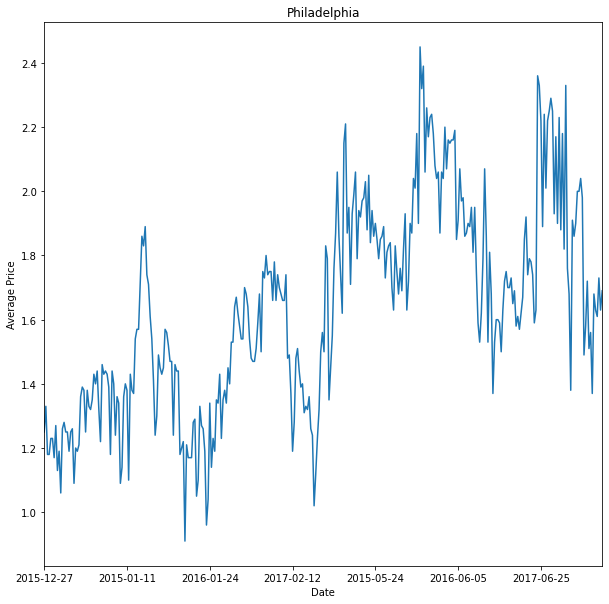

PhoenixTucson


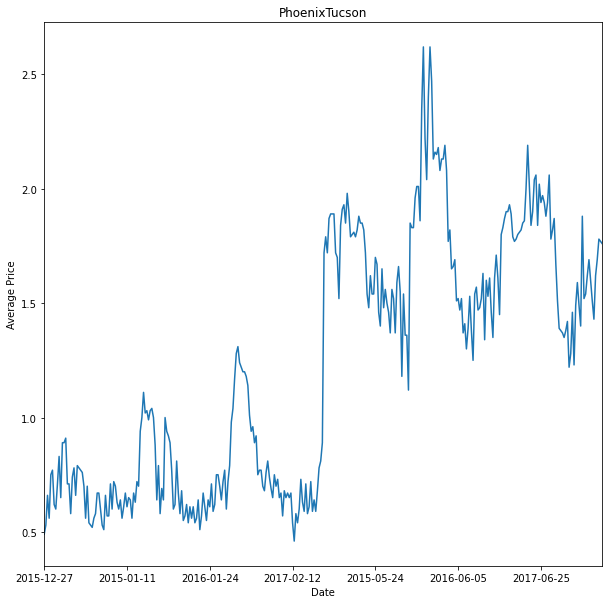

Pittsburgh


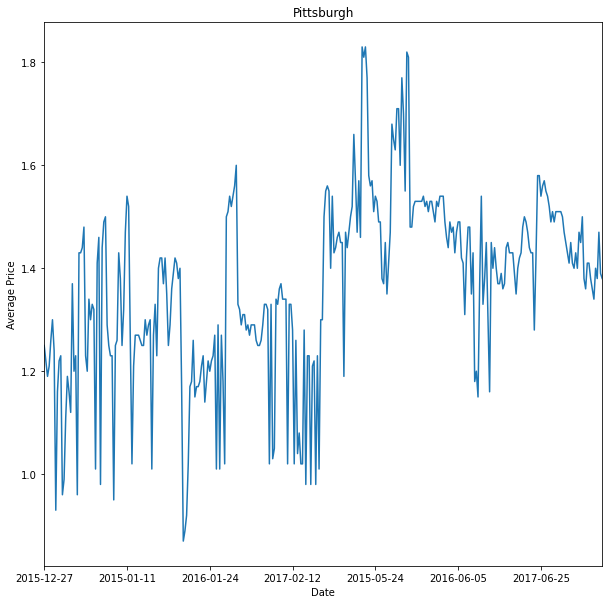

Plains


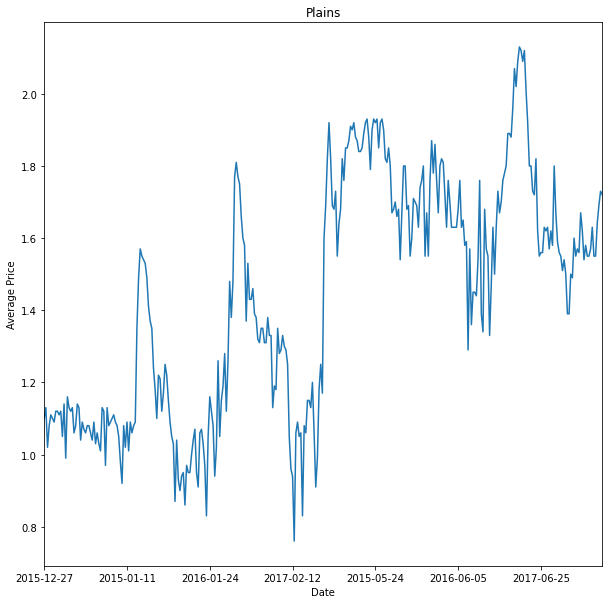

Portland


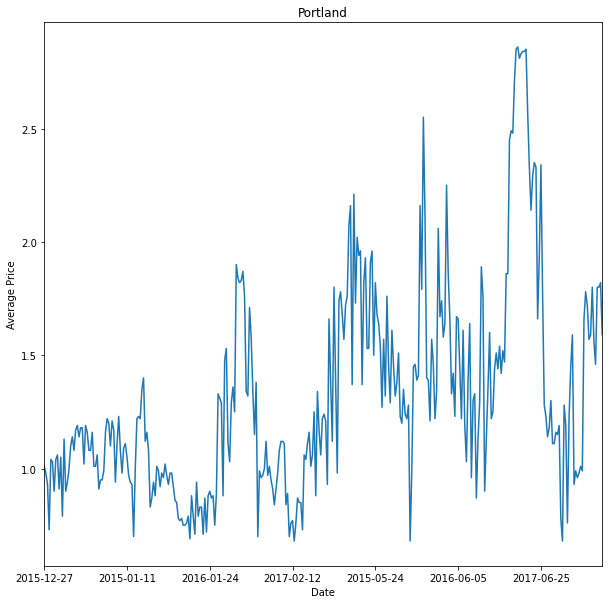

RaleighGreensboro


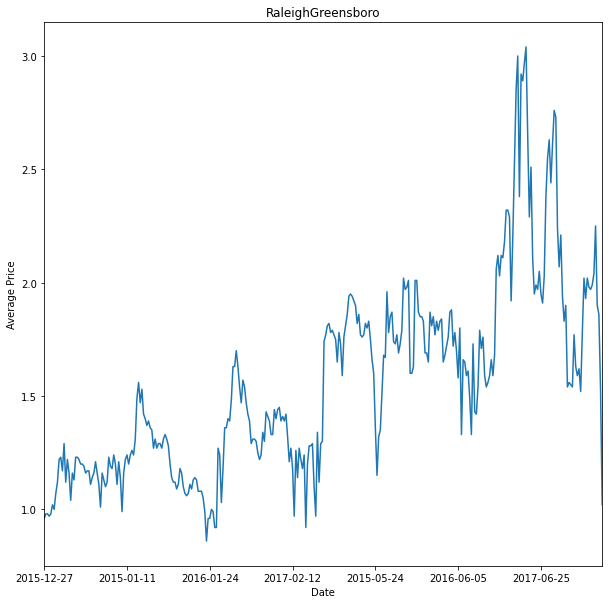

RichmondNorfolk


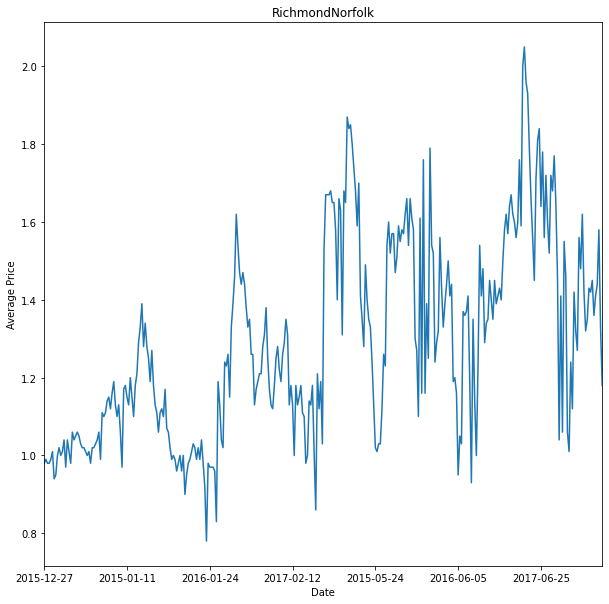

Roanoke


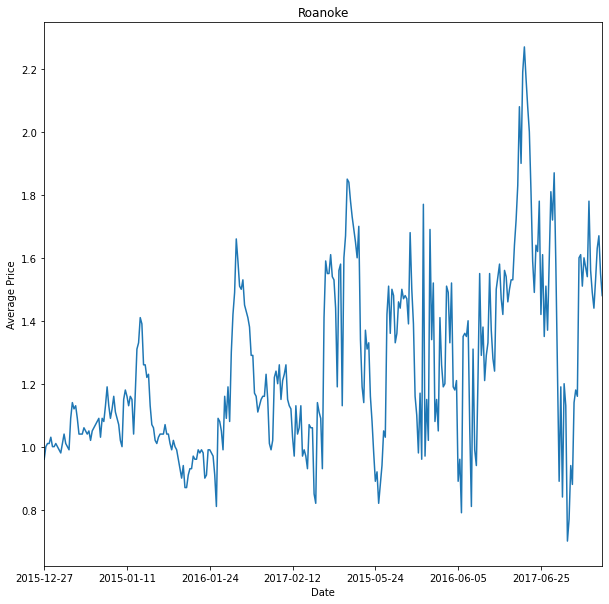

Sacramento


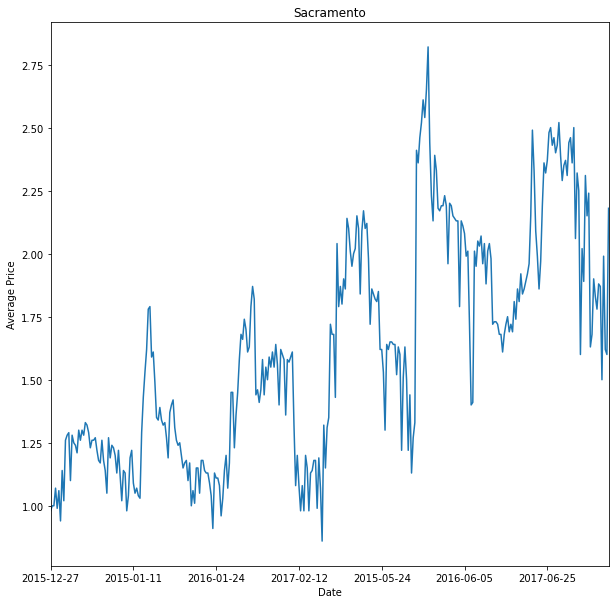

SanDiego


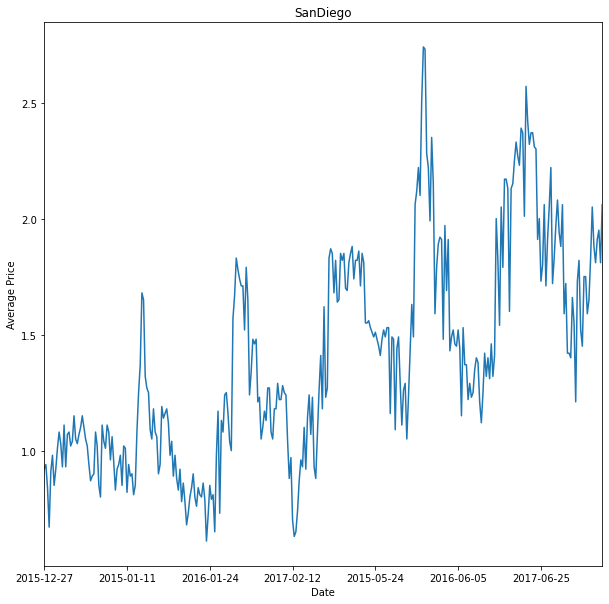

SanFrancisco


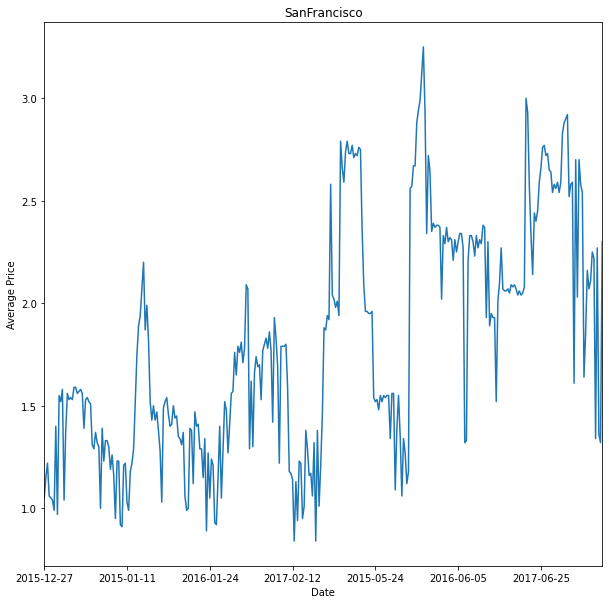

Seattle


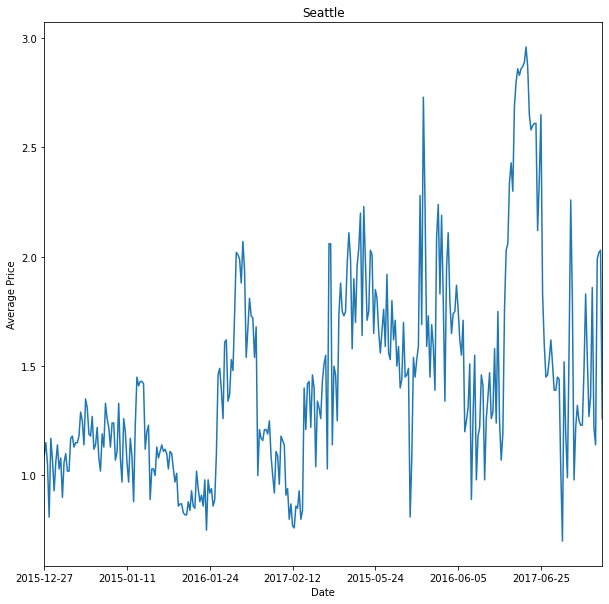

SouthCarolina


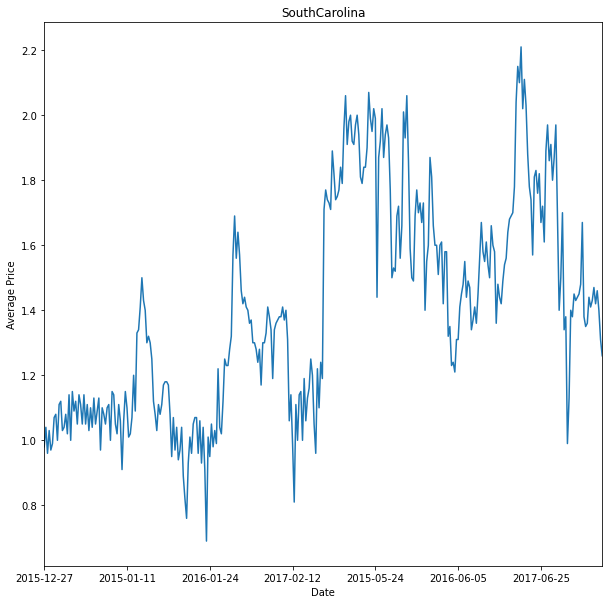

SouthCentral


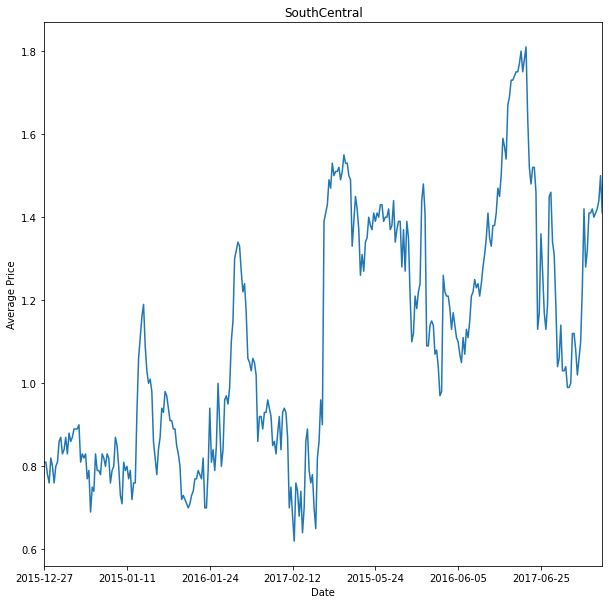

Southeast


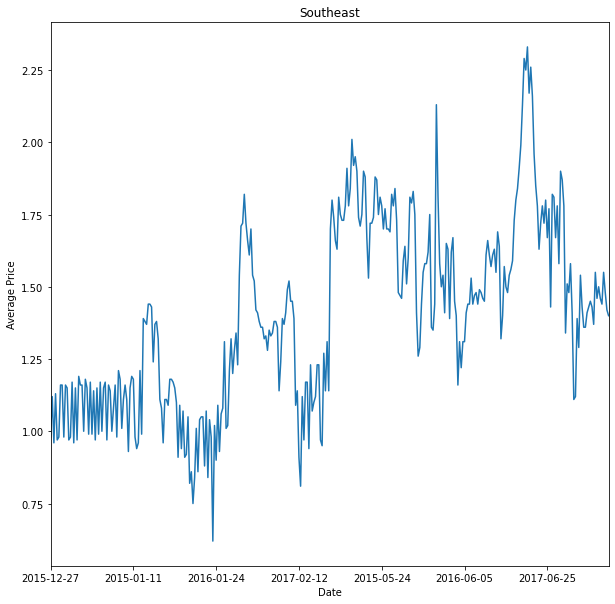

Spokane


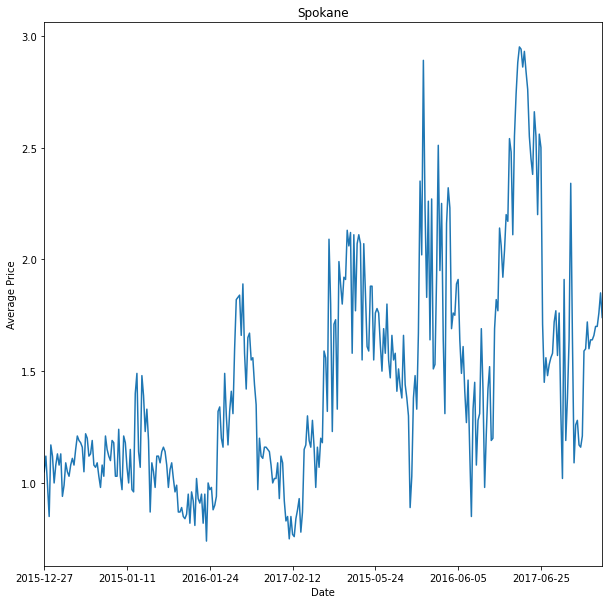

StLouis


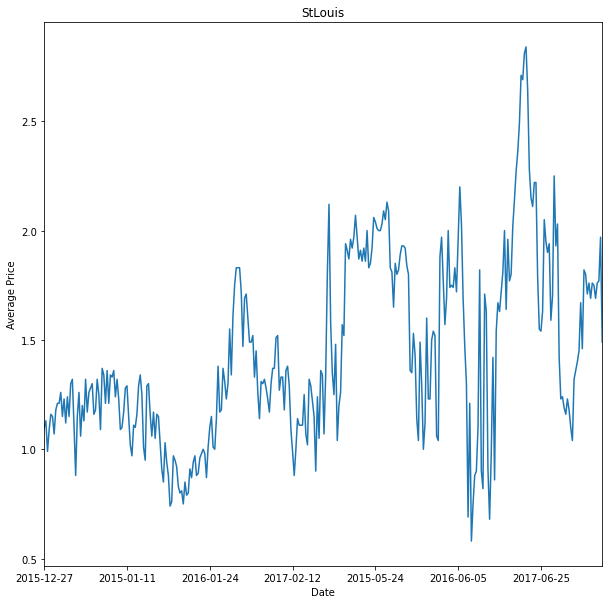

Syracuse


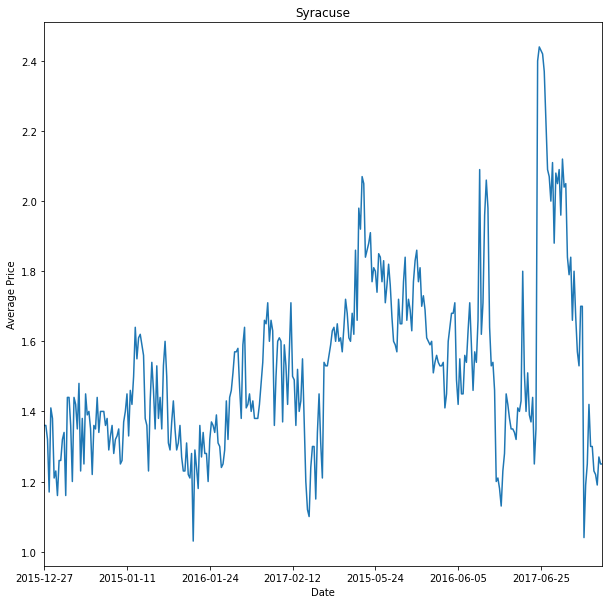

Tampa


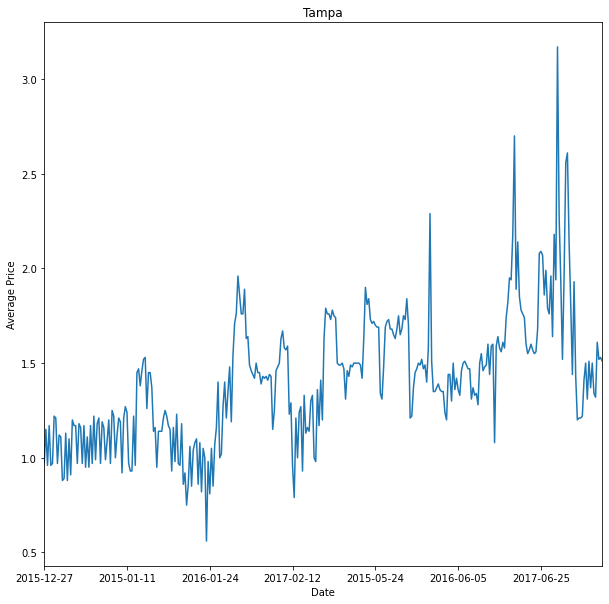

TotalUS


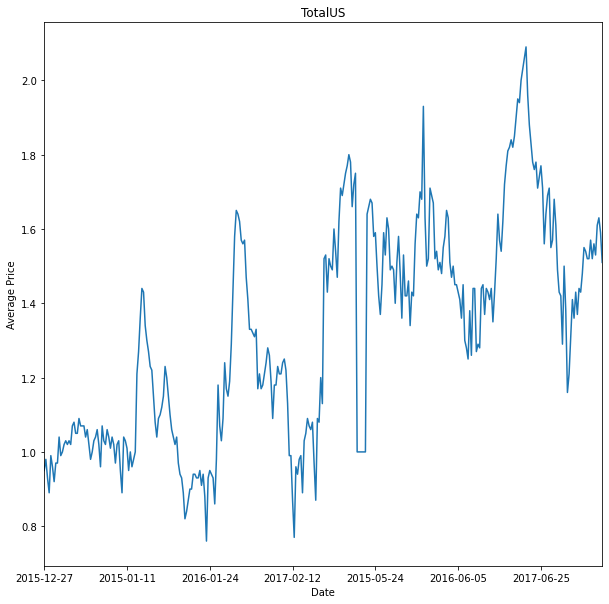

West


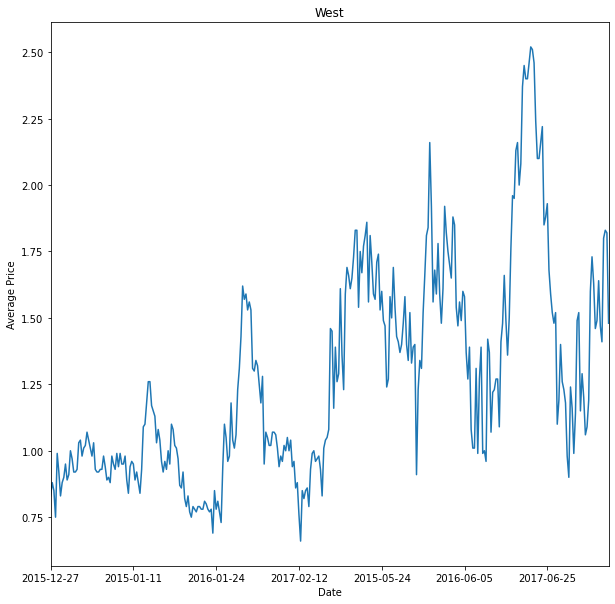

WestTexNewMexico


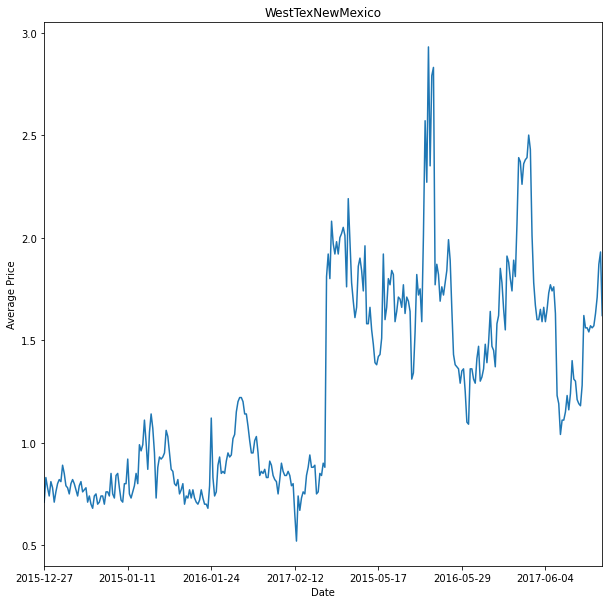

In [12]:
for i in range(len(Region)):
    x=Region[i]
    y=df[df['Region']==x]
    print(x)
    Plot_Time_Series(x,y)

In [13]:
df['Type'].unique()

array(['conventional', 'organic'], dtype=object)

In [14]:
# Scatter Plot creation
def Scatter_plot(X,Y,Z,title):
    ax=sns.scatterplot(x=X, y=Y, hue=Z, data=df, marker='x')
    plt.show()
    plt.figure(figsize=(10,10))
    plt.title(title)
    figure = ax.get_figure()
    figure.savefig(title, dpi=100)
    plt.close()

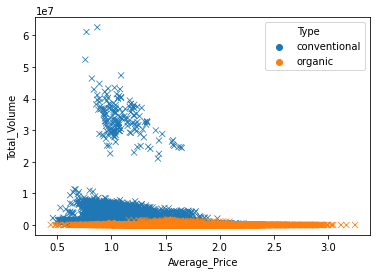

In [15]:
X=df['Average_Price']
Y=df['Total_Volume']
Z=df['Type']
title= 'scatter Plot of Average Price to Total Volume'
Scatter_plot(X,Y,Z,title)

In [62]:
Group_one=df[['Region','Small_Bags','Large_Bags', 'XLarge_Bags', 'Total_Bags']]
Group_one=Group_one.groupby(['Region'],as_index=False).sum()
# DROP a specific row of US total
i=Group_one[(Group_one.Region =='TotalUS')].index
i

Int64Index([51], dtype='int64')

In [63]:
Group_one=Group_one.drop(i)

In [64]:

Group_one= Group_one.sort_values('Small_Bags')
Group_two= Group_one.sort_values('Large_Bags')
Group_three= Group_one.sort_values('XLarge_Bags')
Group_four= Group_one.sort_values('Total_Bags')
Group_one

Region    Small_Bags    Large_Bags  XLarge_Bags    Total_Bags
0                Albany  2.246945e+06  3.898817e+05     43429.16  2.680255e+06
23           Louisville  2.814241e+06  3.713125e+06    107922.98  6.635289e+06
49             Syracuse  3.645651e+06  5.050151e+05     41761.94  4.192427e+06
20         Jacksonville  4.339787e+06  5.273004e+06    105335.77  9.718127e+06
3                 Boise  4.677933e+06  7.110283e+05     10449.34  5.399412e+06
47              Spokane  5.368312e+06  8.788816e+05      7182.72  6.254376e+06
34           Pittsburgh  5.408180e+06  1.779697e+06     57585.02  7.245462e+06
9      CincinnatiDayton  5.661894e+06  1.497219e+07    263830.73  2.089792e+07
19         Indianapolis  6.611064e+06  5.086256e+06    283489.96  1.198081e+07
14          GrandRapids  7.533477e+06  7.968005e+05    838815.37  9.169094e+06
10             Columbus  8.070793e+06  1.724880e+06    220715.52  1.001639e+07
39              Roanoke  8.456339e+06  1.055164e+06     79483.35  9.590988e+06
40           Sacramento  8.696841e+06  7.671504e+04    208711.11  8.982268e+06
31              Orlando  8.927879e+06  7.690514e+06    243247.03  1.686164e+07
21             LasVegas  8.977623e+06  9.059315e+06     16054.32  1.805299e+07
26            Nashville  1.004279e+07  2.812894e+06    111486.16  1.296717e+07
5      BuffaloRochester  1.026843e+07  1.260419e+06     81901.94  1.161075e+07
50                Tampa  1.060807e+07  8.653438e+06    235178.73  1.949669e+07
7             Charlotte  1.064385e+07  9.844872e+05     69603.59  1.169794e+07
17  HartfordSpringfield  1.077856e+07  4.768482e+05     77601.72  1.133301e+07
24    MiamiFtLauderdale  1.121997e+07  1.199081e+07    305657.99  2.351644e+07
30   NorthernNewEngland  1.127697e+07  2.517406e+06    110650.28  1.390503e+07
38      RichmondNorfolk  1.165650e+07  7.279409e+05    123783.85  1.250823e+07
27     NewOrleansMobile  1.185955e+07  1.896699e+06    512688.70  1.426894e+07
48              StLouis  1.193186e+07  2.579377e+06    224797.89  1.473603e+07
16   HarrisburgScranton  1.277287e+07  6.017657e+05    154618.16  1.352925e+07
44        SouthCarolina  1.341335e+07  4.513256e+06    226570.63  1.815317e+07
42         SanFrancisco  1.450235e+07  1.769392e+05    211634.59  1.489092e+07
8               Chicago  1.479465e+07  1.691875e+06    378872.71  1.686540e+07
37    RaleighGreensboro  1.504048e+07  5.411461e+05     95048.10  1.567668e+07
1               Atlanta  1.744274e+07  1.083968e+07    278101.68  2.856051e+07
12               Denver  1.876361e+07  4.014092e+07     52481.28  5.895701e+07
4                Boston  1.991043e+07  1.500167e+06     84879.99  2.149548e+07
53     WestTexNewMexico  1.993176e+07  1.505125e+07    313511.05  3.529652e+07
13              Detroit  1.993907e+07  2.671969e+06   1649024.44  2.426007e+07
41             SanDiego  2.027579e+07  2.921824e+06    145054.97  2.334267e+07
32         Philadelphia  2.141702e+07  2.352056e+06    106151.72  2.387523e+07
33        PhoenixTucson  2.227263e+07  1.648070e+07    154908.38  3.890824e+07
18              Houston  3.252517e+07  1.736376e+07    326132.75  5.021506e+07
2   BaltimoreWashington  3.411761e+07  9.815468e+05    206985.36  3.530615e+07
11        DallasFtWorth  4.082174e+07  5.215721e+06    432293.08  4.646975e+07
36             Portland  4.150862e+07  7.917725e+06     78012.09  4.950436e+07
43              Seattle  4.244714e+07  8.175948e+06     68310.44  5.069140e+07
28              NewYork  5.840168e+07  9.232998e+06    359477.68  6.799416e+07
35               Plains  6.876062e+07  7.973644e+06   1112937.29  7.784720e+07
46            Southeast  1.069033e+08  7.210761e+07   2516762.93  1.815276e+08
15           GreatLakes  1.232875e+08  4.889564e+07   6392523.96  1.785756e+08
25             Midsouth  1.343644e+08  2.077087e+07   1378317.13  1.565136e+08
22           LosAngeles  1.557261e+08  8.463145e+06   4075279.95  1.682645e+08
29            Northeast  1.736230e+08  2.205605e+07   1309367.56  1

In [25]:
# defining the figure size for plot
def cm_to_inch(value):
    return value/2.54

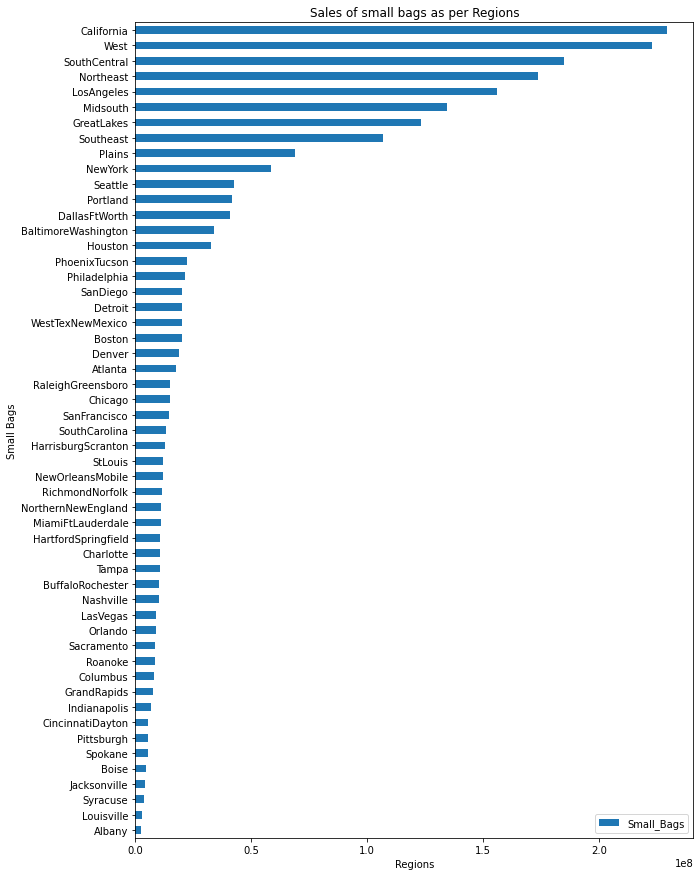

In [65]:
# Sales of small bags as per Regions
ax=Group_one.plot(kind='barh',x='Region',y='Small_Bags',rot=0,figsize=(10,15))
plt.title('Sales of small bags as per Regions')
plt.xlabel('Regions')
plt.ylabel('Small Bags')
figure = ax.get_figure()
figure.savefig('Sales of Large bags as per Regions', dpi=100)
plt.show()
plt.close()

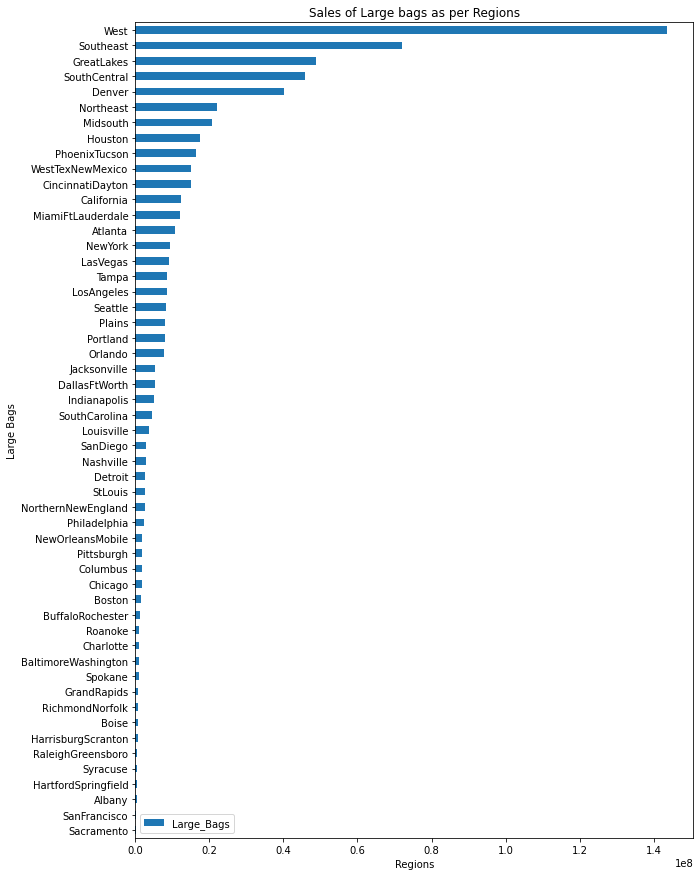

In [66]:
# Sales of large bags as per Regions
ax=Group_two.plot(kind='barh',x='Region',y='Large_Bags',rot=0,figsize=(10,15))
ax.plot(figsize=(20,20))
plt.title('Sales of Large bags as per Regions')
plt.xlabel('Regions')
plt.ylabel('Large Bags')
figure = ax.get_figure()
figure.savefig('Sales of Large bags as per Regions', dpi=100)
plt.show()
plt.close()

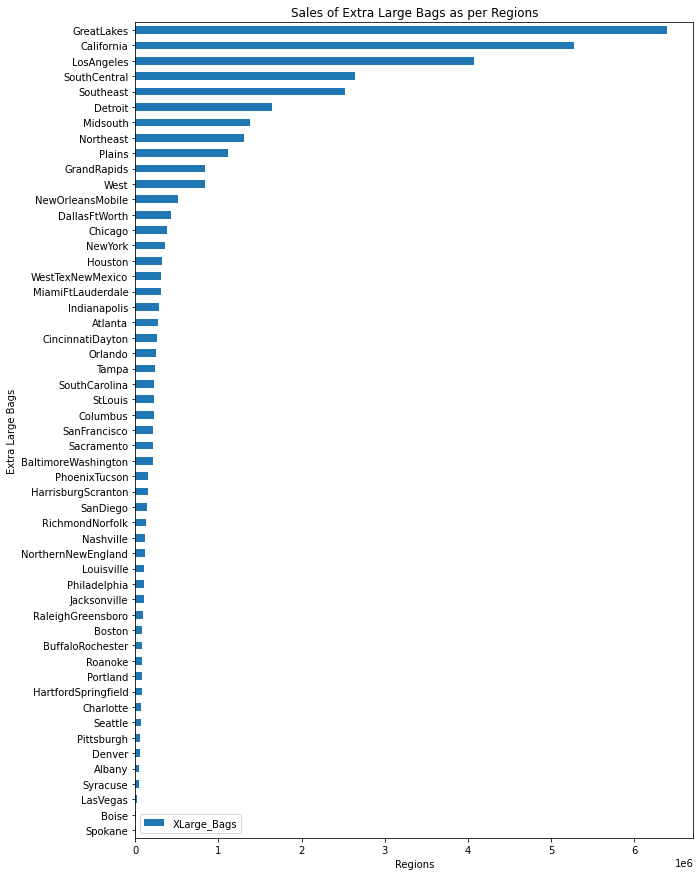

<Figure size 2160x3600 with 0 Axes>

In [90]:
# Sales of Extra large bags as per Regions
ax=Group_three.plot(kind='barh',x='Region',y='XLarge_Bags',rot=0,figsize=(10,15))
plt.title('Sales of Extra Large Bags as per Regions')
plt.xlabel('Regions')
plt.ylabel('Extra Large Bags')
plt.figure(figsize=(30,50))
figure = ax.get_figure()
figure.savefig('Sales of Extra Large bags as per Regions', dpi=100)
plt.show()
plt.close()

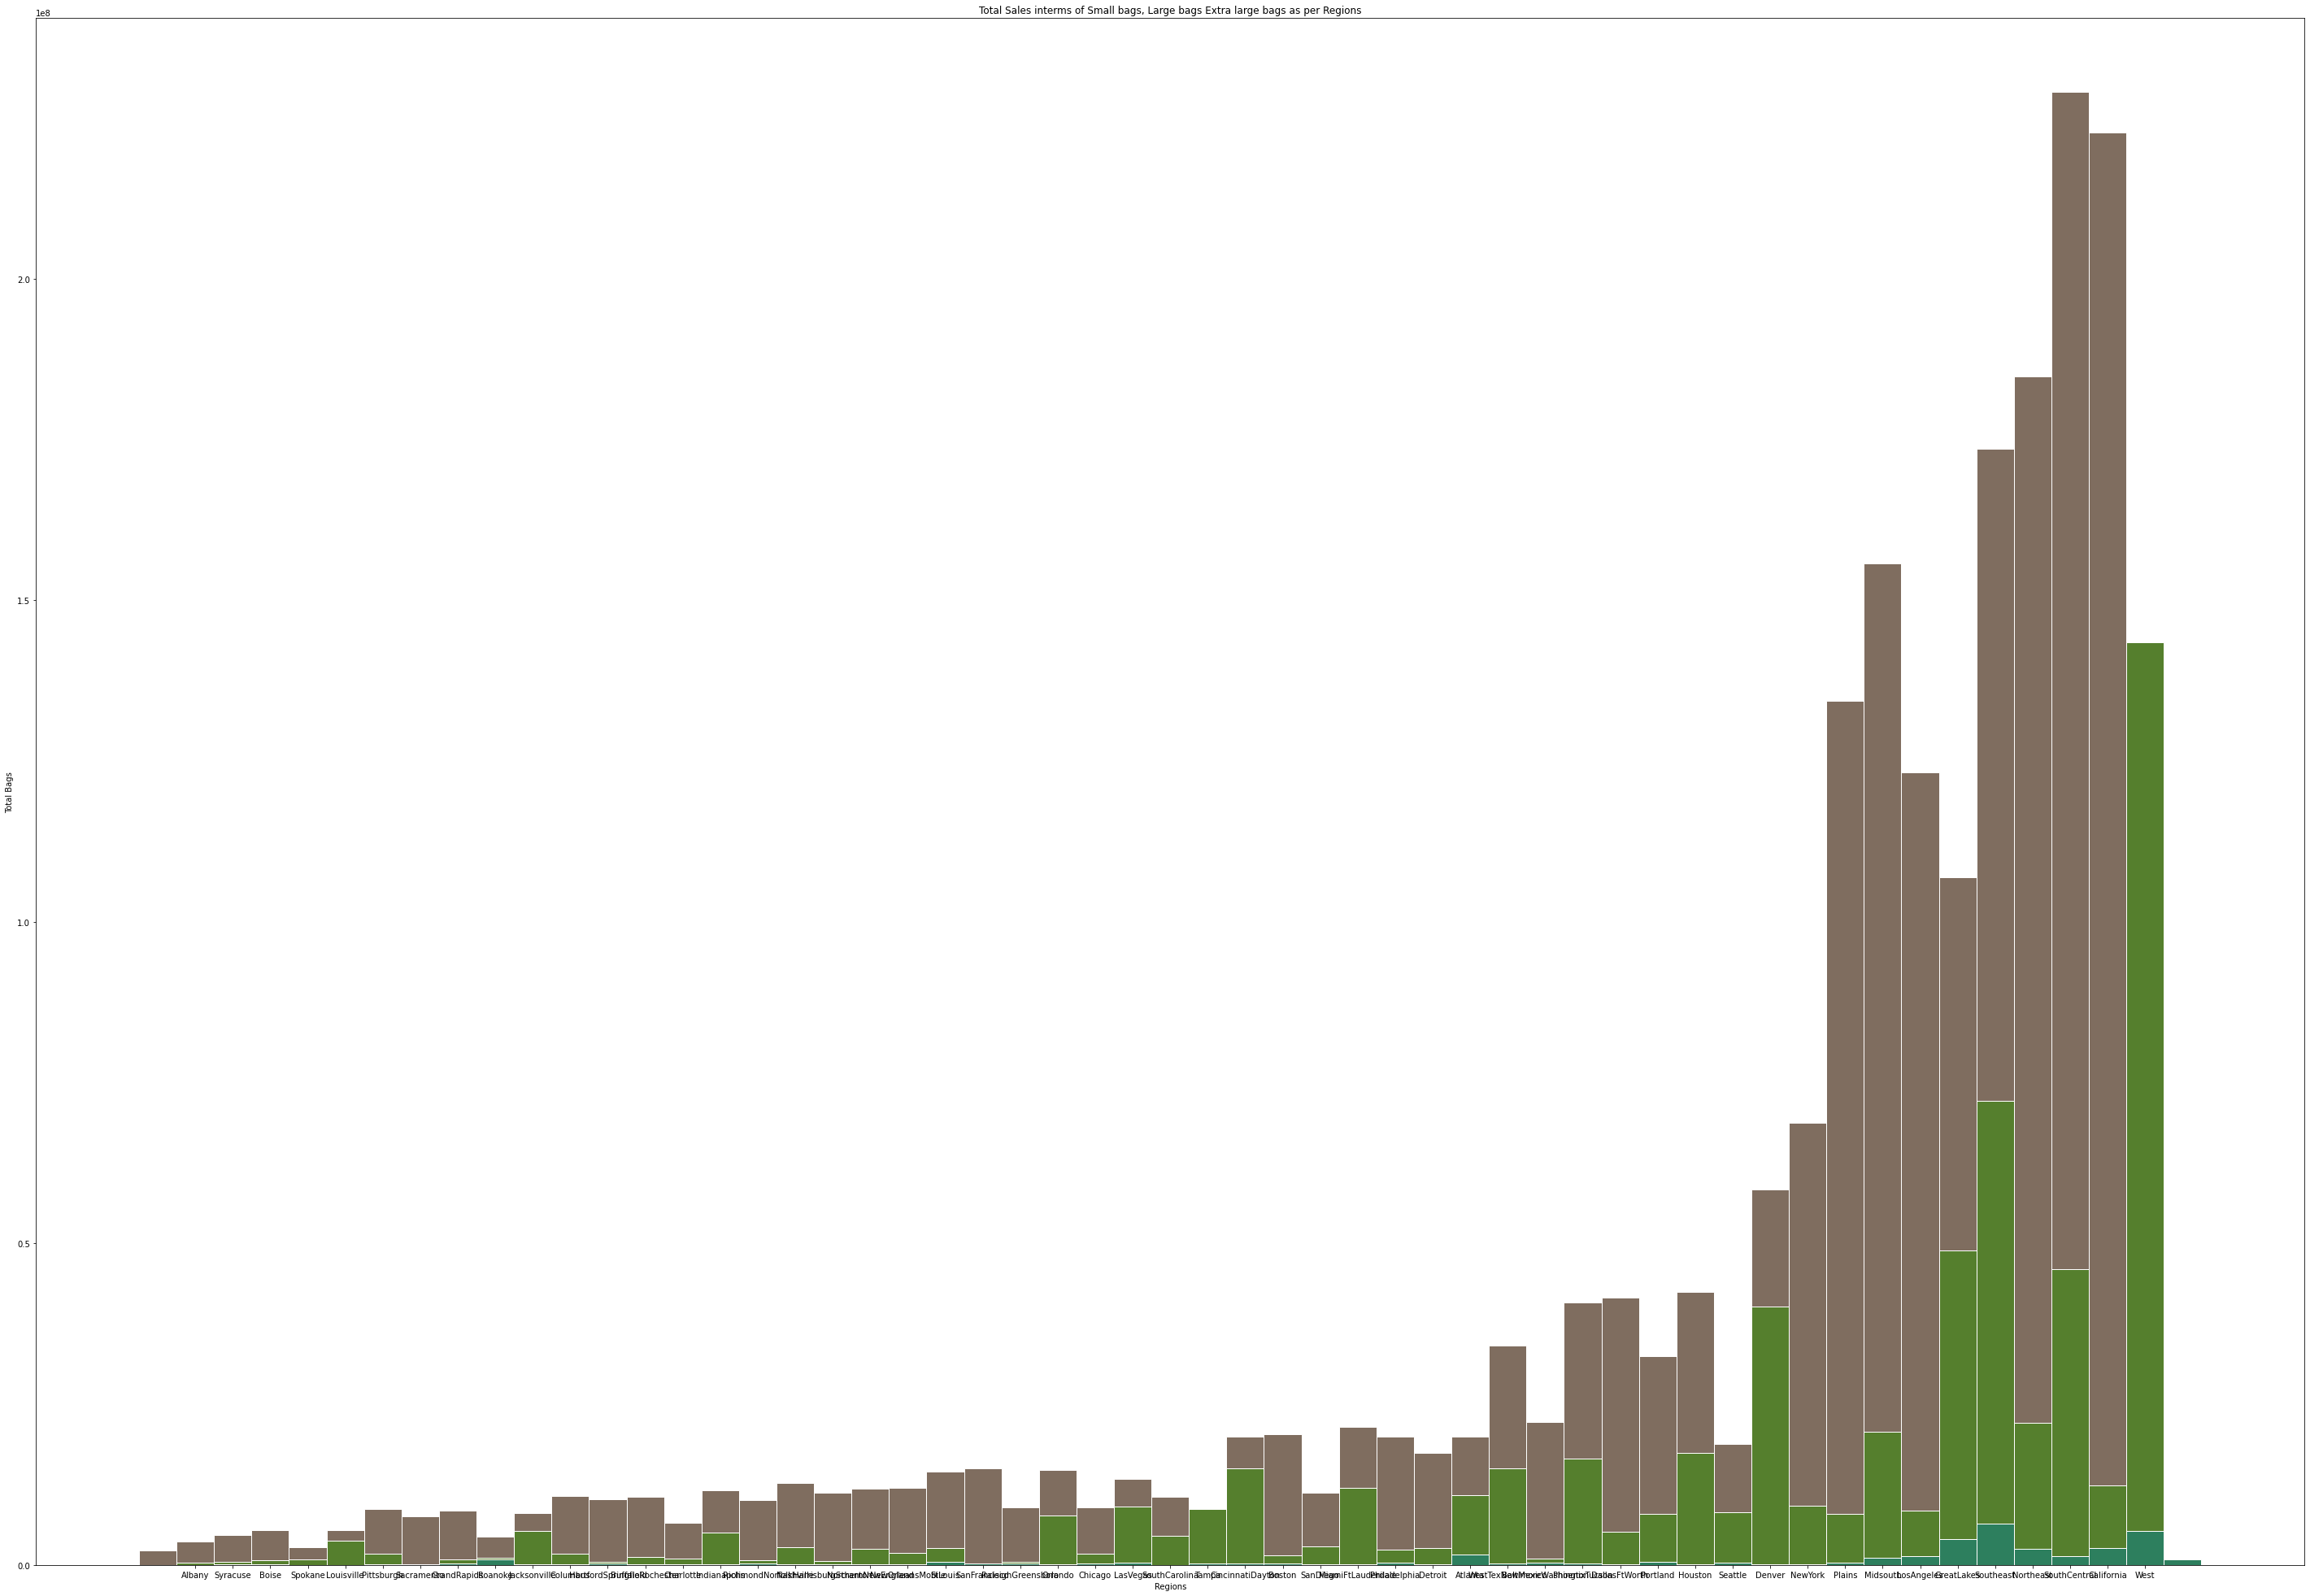

In [89]:

# Total Sales interms of Small bags, Large bags Extra large bags as per Regions

barWidth = 1

bars1=Group_four['Small_Bags']
bars2=Group_four['Large_Bags']
bars3=Group_four['XLarge_Bags']


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.figure(figsize=(50,35))
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')

plt.xticks([r + barWidth for r in range(len(bars1))], Group_four['Region'])
plt.title('Total Sales interms of Small bags, Large bags Extra large bags as per Regions')
plt.xlabel('Regions')
plt.ylabel('Total Bags')

figure = ax.get_figure()
figure.savefig('Sales of Total bags as per Regions', dpi=100)
plt.show()
plt.close()

In [91]:
# check for null values 
df.isnull().sum()

Average_Price    0
Total_Volume     0
PLU_4046_sold    0
PLU_4225_sold    0
PLU_4770_sold    0
Total_Bags       0
Small_Bags       0
Large_Bags       0
XLarge_Bags      0
Type             0
Year             0
Region           0
dtype: int64